# KNN from Scratch

### Article source: [Create a KNN from scratch](https://towardsdatascience.com/create-your-own-k-nearest-neighbors-algorithm-in-python-eb7093fc6339)

## Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Unpacking Dataset

In [4]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

# Preprocess data
X = StandardScaler().fit_transform(X)

# Splikt data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## Model Creation

### Helper Functions

In [9]:
def most_common(lst):
    """
    Returns the most common element in a list.
    """
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    """
    Returns the euclidean distance between a point and data.
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

### Implementation

In [7]:
class KNeighborsClassifierScratch():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
            
        return list(map(most_common, neighbors))
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

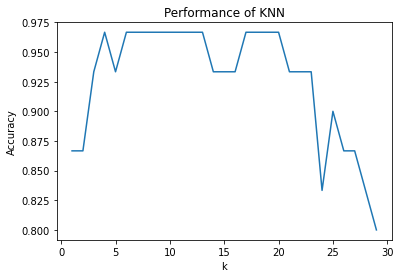

<Figure size 1080x864 with 0 Axes>

In [14]:
accuracies = []
ks = range(1,30)
for k in ks:
    knn = KNeighborsClassifierScratch(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)
    
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of KNN")
plt.figure(figsize=(15,12))
plt.show()

### Helper Functions